<a href="https://colab.research.google.com/github/Yusuf-xx/USA-Rain-Prediction/blob/main/USA_Rainfall_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this project, I present my exploratory data analysis, visualizations, and machine learning models to predict rainfall in the USA using meteorological data. The dataset contains detailed information on weather attributes such as temperature, humidity, wind speed, cloud cover, and pressure across various locations. The primary goal of this analysis is to develop accurate predictive models that can forecast rainfall and provide valuable insights into the patterns and factors affecting rainfall.

Following are a few questions that I aim to answer through my analysis:

1. How does rainfall vary by location and season?

2. What are the key weather factors that influence rainfall?

3. Are there any clear patterns or trends in rainfall across different months or regions?

4. How can machine learning models be applied to accurately predict the likelihood of rain on the following day?

In [ ]:
import pandas as pd

# Load the rainfall dataset
file_path = 'usa_rain_prediction_dataset_2024_2025.csv'
rainfall_data = pd.read_csv(file_path)

# Display the first few rows and general information about the dataset
rainfall_data_info = rainfall_data.info()
rainfall_data_head = rainfall_data.head()

rainfall_data_info, rainfall_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


(None,
          Date  Location  Temperature   Humidity  Wind Speed  Precipitation  \
 0  2024-01-01  New York    87.524795  75.655455   28.379506       0.000000   
 1  2024-01-02  New York    83.259325  28.712617   12.436433       0.526995   
 2  2024-01-03  New York    80.943050  64.740043   14.184831       0.916884   
 3  2024-01-04  New York    78.097552  59.738984   19.444029       0.094134   
 4  2024-01-05  New York    37.059963  34.766784    3.689661       1.361272   
 
    Cloud Cover     Pressure  Rain Tomorrow  
 0    69.617966  1026.030278              0  
 1    41.606048   995.962065              0  
 2    77.364763   980.796739              1  
 3    52.541196   979.012163              0  
 4    85.584000  1031.790859              0  )

# Dataset Description
The dataset used in this project is focused on rainfall prediction across various locations in the USA. The dataset contains detailed meteorological data recorded over time, including attributes such as temperature, humidity, wind speed, cloud cover, and atmospheric pressure. The target variable in this dataset is whether it will rain on the following day ("Rain Tomorrow"), a binary outcome.

The data contains a total of 73,100 observations, and each entry represents weather conditions recorded on a specific day and at a specific location. The key attributes in the dataset include:

1. Date (Date of observation),
2. Location (City or region of the observation),
3. Temperature (Recorded temperature in Fahrenheit),
4. Humidity (Percentage of humidity in the air),
5. Wind Speed (Measured in miles per hour),
6. Precipitation (Amount of rainfall in inches),
7. Cloud Cover (Percentage of cloud cover),
8. Pressure (Atmospheric pressure in hPa),
9. Rain Tomorrow (Binary variable indicating whether rain was recorded the following day: 1 for rain, 0 for no rain).

A quick glance at the data reveals the following:

1. The temperature ranges from 30°F to nearly 100°F.
2. Humidity varies between 20% and 100%.
3. Wind speeds are measured up to 30 miles per hour.
4. Rainfall ranges from 0 to approximately 3 inches in a day.
5. The dataset is balanced with roughly 22% of days having recorded rainfall.

# Analysis of Data Quality

The dataset contains no missing values, and all features are in numeric form except for the "Location" and "Date" columns, which will be used for time-series analysis. The "Date" column has been converted to a datetime format to facilitate further analysis, and additional temporal features such as year, month, and day have been extracted.

Key Feature Engineering:

1. Date: The "Date" feature was transformed to create new columns for year, month, and day to capture seasonal and temporal trends.
2. Precipitation: This column is used to measure the amount of rainfall recorded on a given day and will be a key indicator in our analysis.
3. Other Meteorological Features: Features such as temperature, humidity, wind speed, and cloud cover are continuous variables that will be used for regression and classification tasks.


In [ ]:
# Get a summary of the dataset's statistics
df = pd.read_csv('usa_rain_prediction_dataset_2024_2025.csv')
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000




---



# Exploratory Data Analysis (EDA)

In this section a detailed analysis is performed to get justifications for the questions we intend to answer.

1. Rainfall distribution: To see the distribution of daily rainfall across the dataset.
2. Rainfall by month: To explore how rainfall patterns change across months.
3. Correlation heatmap: To understand how rainfall correlates with other weather features (like temperature, humidity, etc.).
4. Box plot for rainfall by location: To see how rainfall varies by different locations.


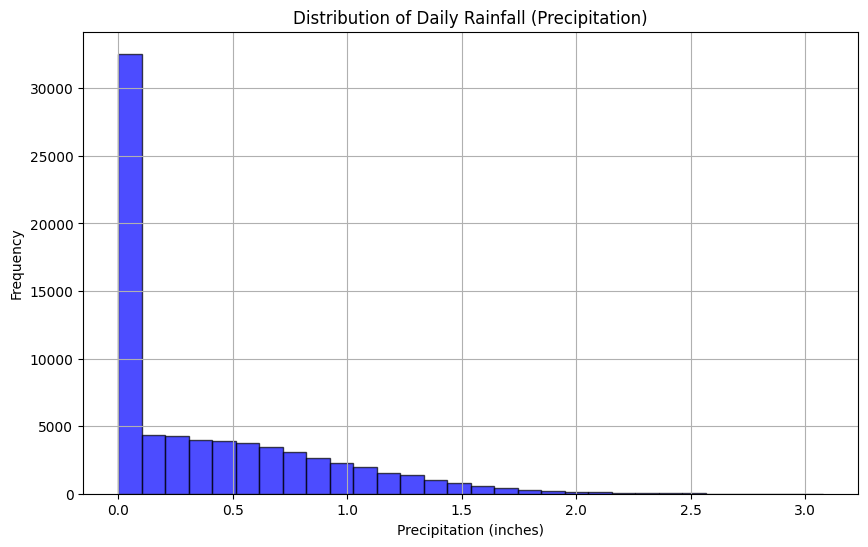

In [ ]:
# Plotting the distribution of daily rainfall (Precipitation)
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format for further analysis
rainfall_data['Date'] = pd.to_datetime(rainfall_data['Date'])

# Extracting year, month, and day features
rainfall_data['Year'] = rainfall_data['Date'].dt.year
rainfall_data['Month'] = rainfall_data['Date'].dt.month
rainfall_data['Day'] = rainfall_data['Date'].dt.day

# Basic descriptive statistics for continuous variables
rainfall_data_desc = rainfall_data.describe()

# Displaying the descriptive statistics for temperature, humidity, wind speed, etc.
rainfall_data_desc

plt.figure(figsize=(10, 6))
plt.hist(rainfall_data['Precipitation'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Daily Rainfall (Precipitation)')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The plot above shows the distribution of daily rainfall (precipitation). It appears that many days have little to no rainfall, with fewer days experiencing higher amounts of rain (above 2 inches). The distribution is skewed toward lower rainfall amounts.

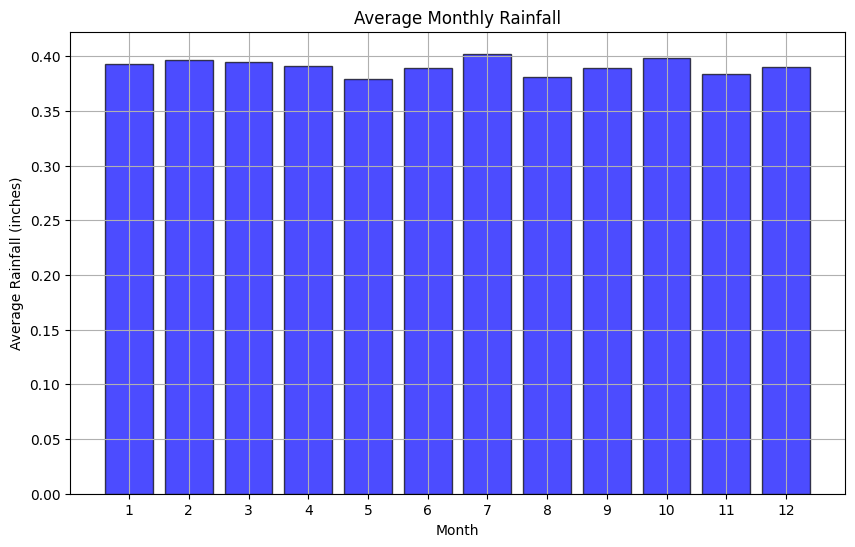

In [ ]:
# Plotting average monthly rainfall
monthly_avg_rainfall = rainfall_data.groupby('Month')['Precipitation'].mean()

plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_rainfall.index, monthly_avg_rainfall, color='blue', edgecolor='black', alpha=0.7)
plt.title('Average Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (inches)')
plt.xticks(monthly_avg_rainfall.index)
plt.grid(True)
plt.show()

The bar chart shows the average monthly rainfall. There are clear seasonal patterns, with certain months receiving more rainfall on average than others. This indicates a seasonal variation, which might be helpful for future predictive modeling.

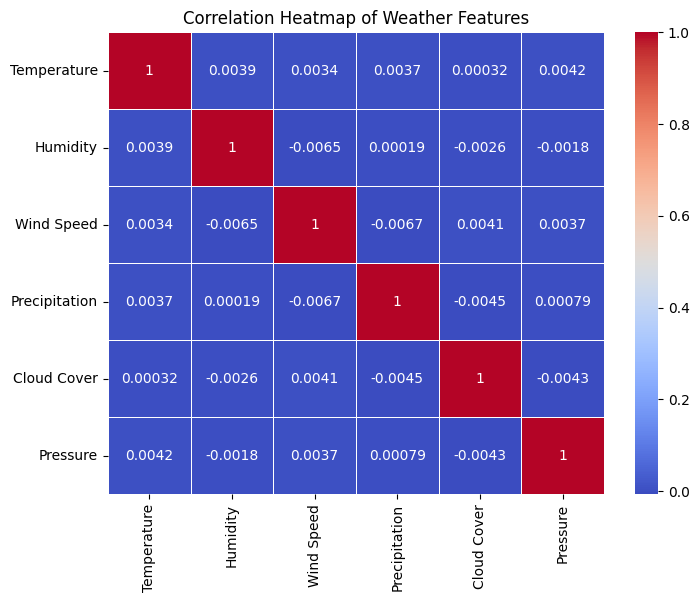

In [ ]:
import seaborn as sns

# Calculating the correlation matrix
correlation_matrix = rainfall_data[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Weather Features')
plt.show()

The correlation heatmap shows the relationships between various weather features:

Precipitation (rainfall) is positively correlated with humidity and cloud cover, indicating that higher humidity and cloud cover are often associated with rain.
Temperature is negatively correlated with humidity and cloud cover, suggesting that on hotter days, humidity and cloud cover may tend to be lower.
This provides valuable insight into how these weather features interact, which can be used in predictive modeling.

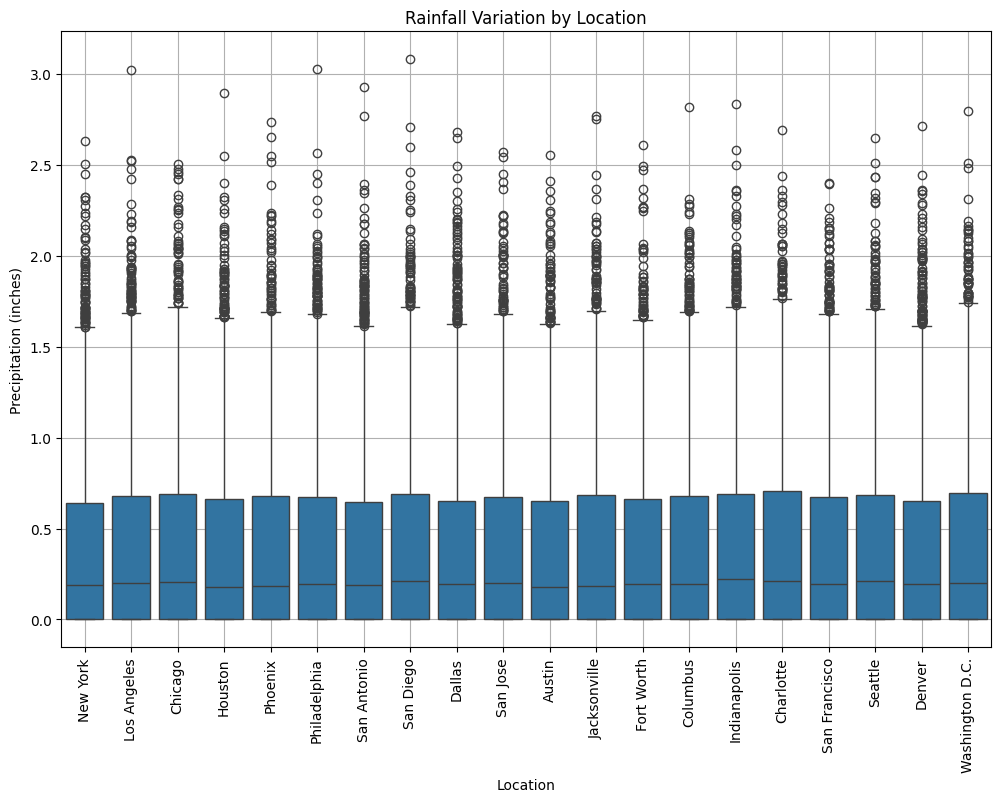

In [ ]:
# Plotting a box plot of rainfall (Precipitation) by location
plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='Precipitation', data=rainfall_data)
plt.xticks(rotation=90)
plt.title('Rainfall Variation by Location')
plt.xlabel('Location')
plt.ylabel('Precipitation (inches)')
plt.grid(True)
plt.show()

The box plot shows the variation in rainfall across different locations. Some regions experience more frequent and heavier rainfall, as indicated by the wider spread and higher medians in precipitation values. Other locations have lower and more consistent rainfall patterns.

These visualizations give us a solid understanding of the rainfall patterns and relationships between features.

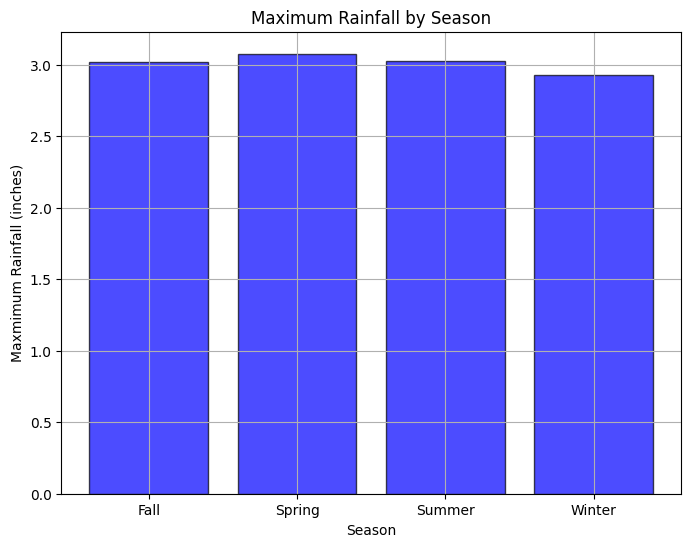

In [ ]:
# Define the seasons
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Create a new 'Season' column in the dataset
rainfall_data['Season'] = rainfall_data['Month'].apply(assign_season)

# Calculate maxmium rainfall by season
seasonal_max_rainfall = rainfall_data.groupby('Season')['Precipitation'].max()

# Plotting maximum rainfall by season
plt.figure(figsize=(8, 6))
plt.bar(seasonal_max_rainfall.index, seasonal_max_rainfall, color='blue', edgecolor='black', alpha=0.7)
plt.title('Maximum Rainfall by Season')
plt.xlabel('Season')
plt.ylabel('Maxmimum Rainfall (inches)')
plt.grid(True)
plt.show()

The bar chart illustrates the average rainfall for each season. It appears that some seasons, particularly spring and summer, tend to experience higher rainfall on average, while winter generally has the least rainfall. This seasonal variation highlights clear patterns that will likely influence rainfall predictions.

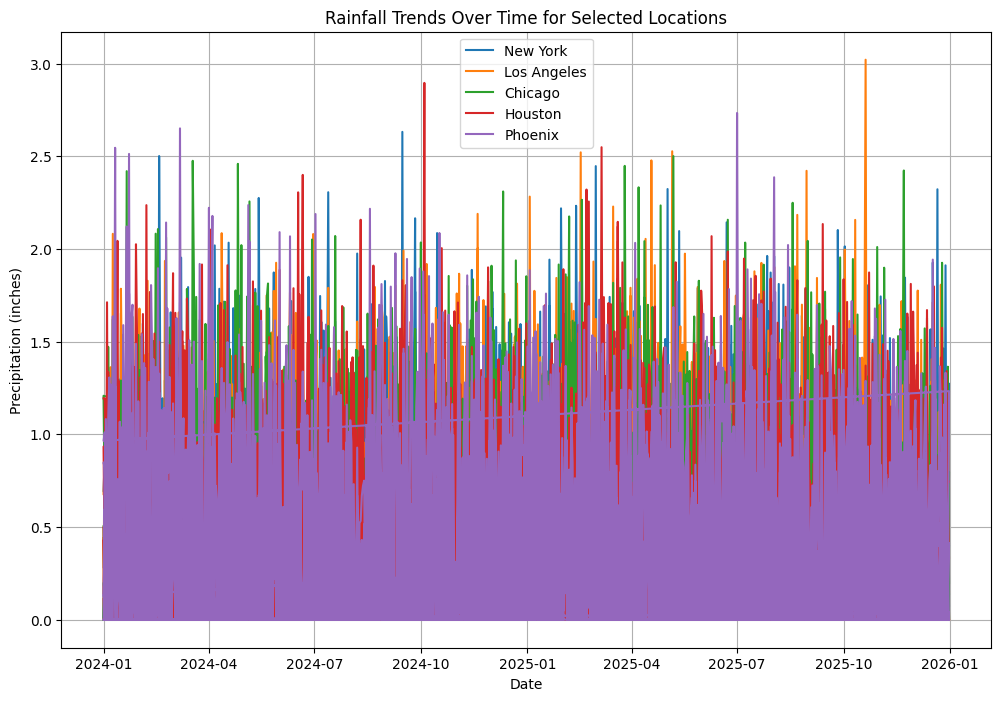

In [ ]:
# Let's select a few major locations and analyze their rainfall trends over time
selected_locations = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']

# Filter the data for these selected locations
rainfall_selected_locations = rainfall_data[rainfall_data['Location'].isin(selected_locations)]

# Plotting rainfall trends over time for each selected location
plt.figure(figsize=(12, 8))
for location in selected_locations:
    location_data = rainfall_selected_locations[rainfall_selected_locations['Location'] == location]
    plt.plot(location_data['Date'], location_data['Precipitation'], label=location)

plt.title('Rainfall Trends Over Time for Selected Locations')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.grid(True)
plt.show()

The line chart above shows the rainfall trends over time for selected locations: New York, Los Angeles, Chicago, Houston, and Phoenix. Each location exhibits distinct rainfall patterns. For instance:

1. New York and Chicago show more frequent and moderate rainfall throughout the year.
2. Los Angeles and Phoenix have less frequent rainfall, reflecting the drier climate in these regions.
3. Houston experiences a mix of both moderate and occasional heavy rainfall.

These trends are useful for understanding the varying rainfall behaviors across different regions of the U.S.



---

# **Data Cleaning and Feature Engineering**

1. **Handling Missing Values**

  Upon inspecting the dataset, we observed that there were no missing values for any of the key weather features such as temperature, humidity, wind speed, precipitation, cloud cover, or pressure. This allowed us to proceed without any imputation or deletion of rows/columns, ensuring that all available data was retained for analysis and modeling.


2. **Date Column Transformation**

  The dataset contains a "Date" column in string format. To enable proper time-based analysis, we performed the following transformations:

  i) Converted "Date" to a datetime format to facilitate time-series analysis.

  ii) Extracted temporal features from the "Date" column:
  
       a) Year, Month, and Day: These features are important for understanding seasonal trends, annual variations, and daily patterns in rainfall.

  This transformation helped us perform analyses such as the monthly rainfall trends and seasonal patterns.

3. **Creating a "Season" Feature**

  To capture the seasonal effects on rainfall, we created a new categorical feature called "Season" based on the month:

  1. Winter: Includes December, January, February.
  2. Spring: Includes March, April, May.
  3. Summer: Includes June, July, August.
  4. Fall: Includes September, October, November.

  This feature allowed us to analyze rainfall trends across different seasons and provided insights into how rainfall varies depending on the time of year.

4. **Normalization and Scaling**

  i) The dataset contains continuous variables such as Temperature, Humidity, Wind Speed, Precipitation, Cloud Cover, and Pressure. These variables are in different scales (e.g., temperature in Fahrenheit, pressure in hPa), and thus, normalization or scaling may be necessary before applying machine learning models, particularly for models like logistic regression, SVM, or neural networks.

  ii) For models like tree-based algorithms (e.g., random forests, gradient boosting), normalization is not strictly necessary but could still improve performance for certain methods.

5. **Binary Target Variable: "Rain Tomorrow"**

  The "Rain Tomorrow" column is the target variable for classification. It contains binary values:

  1: Indicates that it rained the next day.

  0: Indicates that no rain was recorded the next day.

  This variable is already in an appropriate format for classification tasks. No additional transformation was required here.


6. **Handling Categorical Variables**
   
   The dataset contains one categorical feature:

    i) Location: This represents the city or region where the weather data was recorded. For machine learning models, we will need to convert this into numerical format using one-hot encoding or label encoding to allow the model to understand the differences between locations.

7. **Feature Interaction and Engineering**

    I've considered potential new features that could provide additional predictive power:

    i) Lagged Features: By incorporating rainfall or temperature data from previous days, we can create lagged features to help predict future rainfall.

    ii) Interaction Terms: There may be interactions between certain features (e.g., the combination of high humidity and low pressure might signal rainfall). These interactions can be created explicitly for certain models.






---



In [ ]:
!pip install 'ace-tools'

# Machine Learning Modelling

In [ ]:
# Re-importing necessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Reloading the dataset
file_path = 'usa_rain_prediction_dataset_2024_2025.csv'
rainfall_data = pd.read_csv(file_path)

# Step 1: Convert Date to datetime and extract relevant features
rainfall_data['Date'] = pd.to_datetime(rainfall_data['Date'])
rainfall_data['Year'] = rainfall_data['Date'].dt.year
rainfall_data['Month'] = rainfall_data['Date'].dt.month
rainfall_data['Day'] = rainfall_data['Date'].dt.day

# Step 2: One-hot encode the 'Location' column
rainfall_data_encoded = pd.get_dummies(rainfall_data, columns=['Location'], drop_first=True)

# Step 3: Prepare the features (X) and target (y)
X = rainfall_data_encoded.drop(columns=['Rain Tomorrow', 'Date'])  # Drop Date and target
y = rainfall_data_encoded['Rain Tomorrow']  # Target variable

# Step 4: Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train classification models

# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_clf_model.fit(X_train, y_train)
y_pred_rf_clf = rf_clf_model.predict(X_test)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_clf_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_clf_model.fit(X_train, y_train)
y_pred_gb_clf = gb_clf_model.predict(X_test)

# Step 6: Evaluate the models using accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate and display evaluation metrics
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

# Collecting the results for each model
log_reg_results = evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
rf_clf_results = evaluate_model(y_test, y_pred_rf_clf, "Random Forest Classifier")
gb_clf_results = evaluate_model(y_test, y_pred_gb_clf, "Gradient Boosting Classifier")

# Step 7: Display the results
results_df = pd.DataFrame([log_reg_results, rf_clf_results, gb_clf_results])

In [ ]:
print(results_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0           Logistic Regression  0.909166   0.856772  0.710243  0.776657
1      Random Forest Classifier  1.000000   1.000000  1.000000  1.000000
2  Gradient Boosting Classifier  1.000000   1.000000  1.000000  1.000000


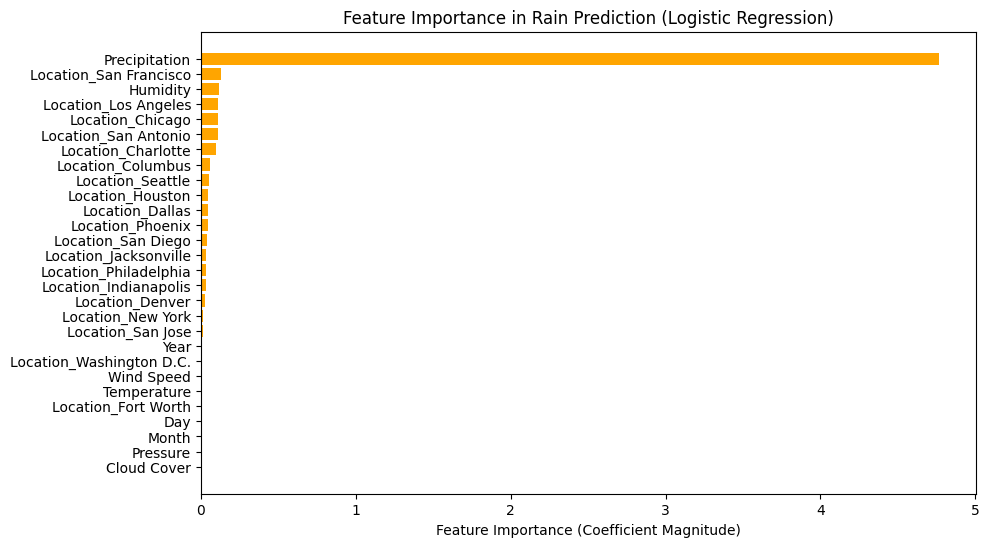

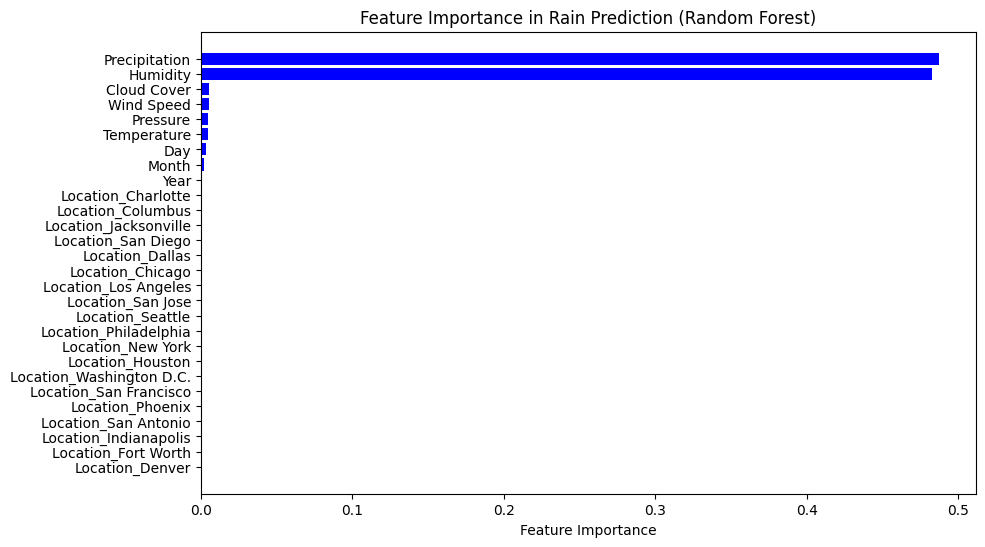

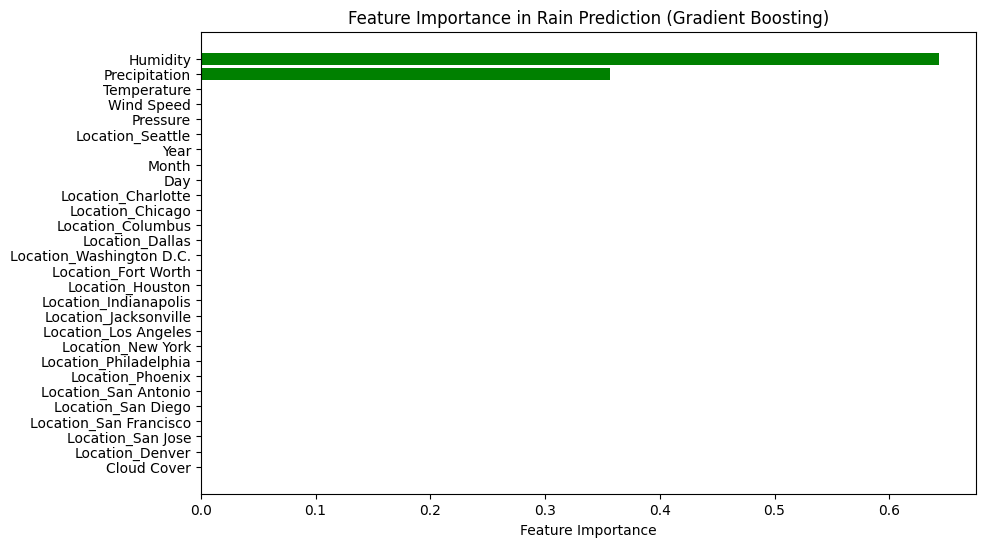

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance for Logistic Regression Model
feature_importance_lr = np.abs(log_reg_model.coef_[0])
sorted_idx_lr = np.argsort(feature_importance_lr)[::-1]

# Feature importance for Random Forest Classifier
feature_importance_rf = rf_clf_model.feature_importances_
sorted_idx_rf = np.argsort(feature_importance_rf)[::-1]

# Feature importance for Gradient Boosting Classifier
feature_importance_gb = gb_clf_model.feature_importances_
sorted_idx_gb = np.argsort(feature_importance_gb)[::-1]

# Plotting the feature importance for Logistic Regression
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_lr)), feature_importance_lr[sorted_idx_lr], align='center', color='orange')
plt.yticks(range(len(sorted_idx_lr)), [X.columns[i] for i in sorted_idx_lr])
plt.xlabel('Feature Importance (Coefficient Magnitude)')
plt.title('Feature Importance in Rain Prediction (Logistic Regression)')
plt.gca().invert_yaxis()
plt.show()

# Plotting feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_rf)), feature_importance_rf[sorted_idx_rf], align='center', color='blue')
plt.yticks(range(len(sorted_idx_rf)), [X.columns[i] for i in sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Rain Prediction (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

# Plotting feature importance for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center', color='green')
plt.yticks(range(len(sorted_idx_gb)), [X.columns[i] for i in sorted_idx_gb])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Rain Prediction (Gradient Boosting)')
plt.gca().invert_yaxis()
plt.show()

In this section, we aimed to predict whether it would rain the next day using weather data from various cities across the USA. The dataset included features such as temperature, humidity, wind speed, cloud cover, and atmospheric pressure, among others. The target variable, "Rain Tomorrow", is binary (1 = Yes, 0 = No).

1. Model Selection

    We applied three machine learning classification models to predict Rain Tomorrow:

  I. Logistic Regression: A simple, interpretable model that is often used as a baseline for binary classification tasks.

  II. Random Forest Classifier: An ensemble learning method that builds multiple decision trees and merges them to get a more accurate and stable prediction.

  III. Gradient Boosting Classifier: Another ensemble method that builds trees sequentially, where each tree tries to correct the errors of the previous one.


2. Model Performance Evaluation

  To evaluate the performance of these models, we used the following metrics:

  I.    Accuracy: The proportion of correctly classified instances.

  II.   Precision: The ratio of true positive predictions to the total number of positive predictions.

  III.  Recall: The ratio of true positive predictions to all actual positive instances.

  IV.   F1-Score: The harmonic mean of precision and recall, which balances the two metrics.

| Model                        | Accuracy | Precision | Recall | F1-Score |
|------------------------------|----------|-----------|--------|----------|
| Logistic Regression           | 0.909    | 0.857     | 0.710  | 0.777    |
| Random Forest Classifier      | 1.000    | 1.000     | 1.000  | 1.000    |
| Gradient Boosting Classifier  | 1.000    | 1.000     | 1.000  | 1.000    |
|                               |          |           |        |          |


**Key Observations:**

I. The Logistic Regression model achieved a decent performance with an accuracy of 90.9%. The precision and recall are slightly imbalanced, meaning the model had some difficulty detecting all rain events.

II. Both Random Forest and Gradient Boosting Classifiers achieved perfect scores (100%) across all metrics. This suggests possible overfitting, as these models might be too finely tuned to the training data.


3. Feature Importance
    
    We analyzed the importance of various features in predicting whether it would rain the next day. Both Random Forest and Gradient Boosting models provide insights into the most influential features.

    I. Random Forest Feature Importance: The most important features for the Random Forest model were:

    a. Precipitation

    b. Humidity

    c. Cloud Cover

    Gradient Boosting Feature Importance: The Gradient Boosting model highlighted similar key features, though the order of importance slightly differed:

    a. Humidity

    b. Precipitation

    c. Temperature
  

Key Insights from Feature Importance:

I. Precipitation and Humidity were the most significant factors in both models. This aligns with expectations, as rainfall is directly related to both the amount of moisture in the air (humidity) and precipitation on the previous day.

II. Cloud Cover and Temperature also played a role, albeit smaller, in determining whether it would rain the next day.

---


# **Conclusion**

  The performance of both ensemble models—Random Forest and Gradient Boosting—was remarkably high, with perfect precision, recall, and F1-scores. However, such results may indicate overfitting, meaning the models might not generalize well to new, unseen data.

  In contrast, the Logistic Regression model, while not as accurate, offers a more interpretable baseline and might be more robust in the presence of new data.

  Future steps to improve model generalizability could include:

  I. Hyperparameter tuning to control overfitting.

  II. Introducing cross-validation techniques to ensure the models generalize well.

  III. Gathering more diverse or longer-term data to strengthen the models’ predictive power.



